In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mão na massa - Aula 1

In [2]:
url = '/content/drive/MyDrive/Deep Learning com Tensorflow Keras/TensorFlow Keras: classificando imagens com redes convolucionais/curso-tensorflow-convolucao-main/dados/catarata'

In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path(url)

In [5]:
import tensorflow as tf

In [6]:
altura = 416
largura = 416
batch_size = 64

In [9]:
treino = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = 'training',
    seed = 568, image_size = (altura, largura), batch_size = batch_size)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [7]:
validacao = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = 'validation',
    seed = 568, image_size = (altura, largura), batch_size = batch_size)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [10]:
treino.class_names

['immature', 'mature']

#Mão na Massa - Aula 2

In [11]:
tf.random.set_seed(245)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epocas = 10

history = modelo.fit(treino, validation_data = validacao, epochs = epocas)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.9155 - loss: 0.4630 - val_accuracy: 0.9878 - val_loss: 0.0491
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.9502 - loss: 0.4135 - val_accuracy: 0.9268 - val_loss: 0.5635
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.9755 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9949 - loss: 0.0108 - val_accuracy: 0.9512 - val_loss: 0.2483
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.9961 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 6.2627e-05
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.9987 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 7.2340e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 1.0000 - loss: 1.0286e-05 - val_accuracy: 1.0000 - val_loss: 2.4749e-05
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 1.0000 - loss: 9.2549e-07 - val_accuracy

In [ ]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 519168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      66,453,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,361,285 (760.50 MB)

 Trainable params: 66,453,761 (253.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,907,524 (507.00 MB)

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plota_resultados(history, epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize = (12,6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label = 'Acurácia de Treino')
  plt.plot(intervalo_epocas, val_acc, label = 'Acurácia de Validação')
  plt.legend(loc = 'lower right')

  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label = 'Erro de Treino')
  plt.plot(intervalo_epocas, val_loss, label = 'Erro de Validação')
  plt.legend(loc = 'upper right')

  plt.show()

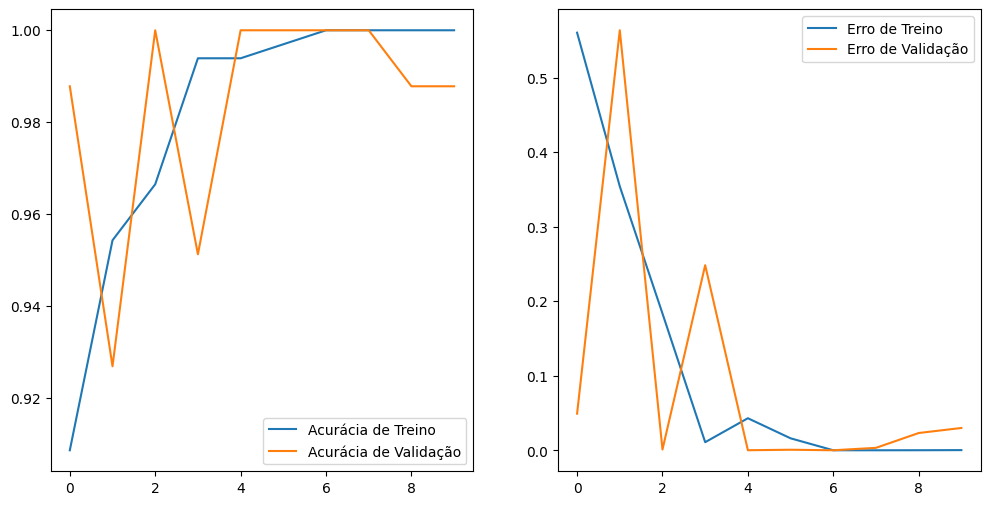

In [ ]:
plota_resultados(history, epocas)

#Mão na massa - Aula 3

In [ ]:
#modelo2 - Conv2d / Max Pooling

modelo2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
modelo2.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epocas = 10

history2 = modelo2.fit(treino, validation_data = validacao, epochs = epocas)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9268 - val_loss: 0.1611
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9756 - val_loss: 0.0714
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9756 - val_loss: 0.0654
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9390 - val_loss: 0.1137
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 1.0000 - loss: 7.1658e-04 - val_accuracy: 0.9390 - val_loss: 0.1293
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 1.0000 - loss: 8.0251e-04 - val_accuracy: 0.9756 - val_loss: 0.0664
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 1.0000 - loss: 4.9263e-04 - val_accuracy: 0.9878 - val_loss: 0.0578
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 1.0000 - loss: 4.4644e-04 - val_accuracy: 0.

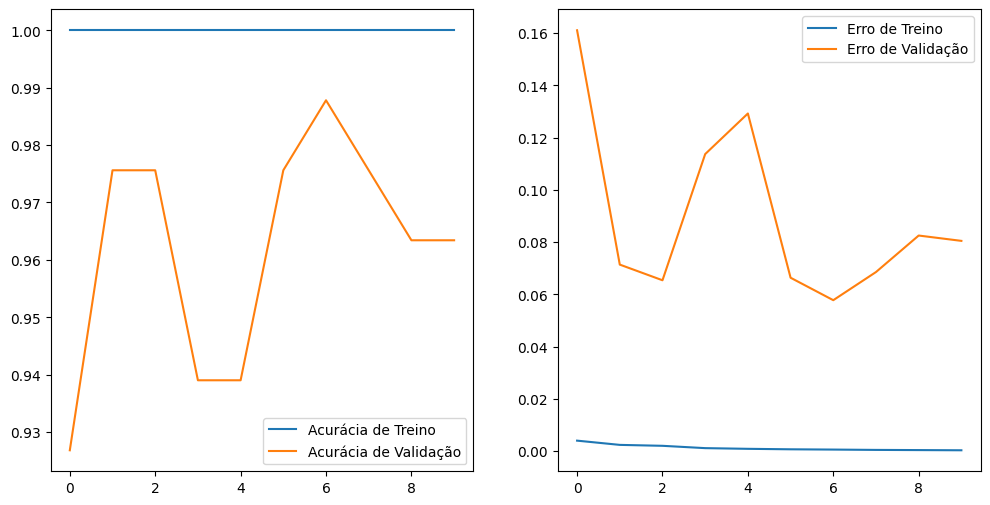

In [ ]:
plota_resultados(history2, epocas)

# Mão na massa - Aula 4

In [16]:
input_shape = (416, 416, 3)

modelo_base = tf.keras.applications.InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

In [17]:
modelo_base.trainable = False
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 416, 416, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 207, 207, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 207, 207, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 207, 207, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 205, 205, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 205, 205, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 205, 205, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 205, 205, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 205, 205, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 205, 205, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 102, 102, 64)   │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 102, 102, 80)   │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 102, 102, 80)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [18]:
rescale = tf.keras.layers.Rescaling(1./255)
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [19]:
ultima_camada = modelo_base.get_layer('mixed7')
print('tamanho da ultima camada: ', ultima_camada.output.shape)
ultima_saida = ultima_camada.output

tamanho da ultima camada:  (None, 24, 24, 768)


In [33]:
x = tf.keras.layers.Flatten()(ultima_saida)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

modelo = tf.keras.Model(inputs = modelo_base.input, outputs = x)

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 

In [28]:
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 416, 416, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 207, 207, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 207, 207, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 207, 207, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 205, 205, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 205, 205, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 205, 205, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 205, 205, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 205, 205, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 205, 205, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 102, 102, 64)   │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 102, 102, 80)   │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 102, 102, 80)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 461,962,145 (1.72 GB)

 Trainable params: 452,986,881 (1.69 GB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [31]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs = epocas)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-32-b2a765db8ded>", line 3, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

Out of memory while trying to allocate 2274096400 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_40610]

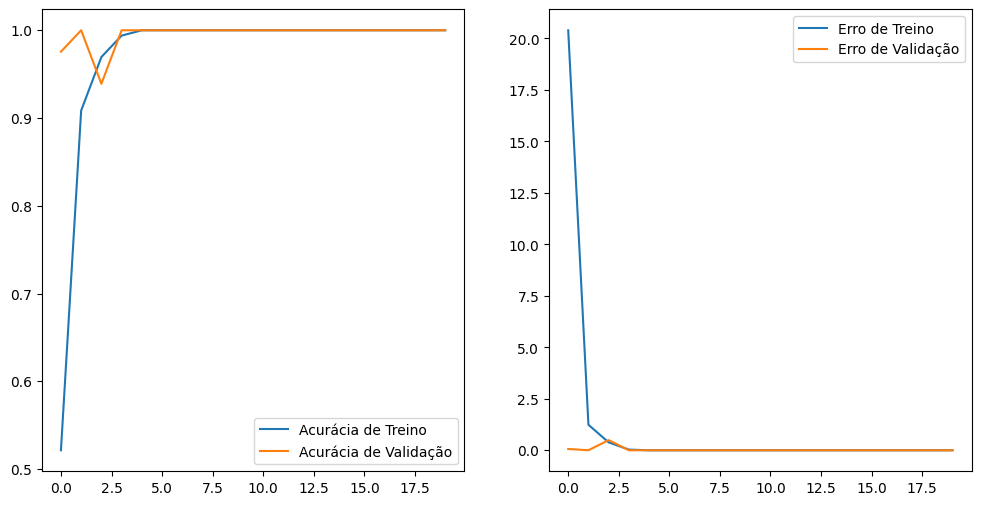

In [24]:
plota_resultados(history, epocas)

In [25]:
# Gerar previsões nos dados de validação
predicoes = modelo.predict(validacao)

# Converter previsões em classes binárias (0 ou 1)
predicoes_binarias = (predicoes > 0.5).astype(int)

# Exibir algumas previsões com rótulos reais
for i, (imagem, rotulo) in enumerate(validacao.unbatch().take(5)):
    rotulo_real = rotulo.numpy().flatten()[0] if len(rotulo.shape) > 0 else rotulo.numpy()
    print(f"Imagem {i+1}: Previsão: {predicoes_binarias[i][0]}, Rótulo real: {rotulo_real}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step
Imagem 1: Previsão: 0, Rótulo real: 1
Imagem 2: Previsão: 0, Rótulo real: 0
Imagem 3: Previsão: 1, Rótulo real: 0
Imagem 4: Previsão: 0, Rótulo real: 1
Imagem 5: Previsão: 0, Rótulo real: 1
